**DSA_PROJECT [TOPIC : REALESTATE AND PROPERTIES]**

STEP 1 : IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


STEP 2 : READ DATASET

In [2]:

df = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [3]:
#Preview dataset

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,property_type,furnishing_status,age_of_property,floor,car_parking,nearby_schools
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Plot,Unfurnished,7.0,13,3,4
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Studio,Furnished,5.0,6,0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,Apartment,Unfurnished,9.0,7,1,2
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,Villa,Unfurnished,10.0,5,1,9
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,Villa,Semi-furnished,1.0,2,3,9


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,property_type,furnishing_status,age_of_property,floor,car_parking,nearby_schools
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Independent House,Semi-furnished,6.0,20,2,3
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0,Plot,Unfurnished,1.0,10,3,2
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0,Independent House,Unfurnished,NaN,4,1,6
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0,Plot,Furnished,9.0,19,0,0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0,Independent House,Unfurnished,2.0,20,0,10


STEP 3 : UNDERSTANDING OF DATA

In [5]:
df.shape

(13320, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          13320 non-null  object 
 1   availability       13320 non-null  object 
 2   location           13319 non-null  object 
 3   size               13304 non-null  object 
 4   society            7818 non-null   object 
 5   total_sqft         13320 non-null  object 
 6   bath               13247 non-null  float64
 7   balcony            12711 non-null  float64
 8   price              13320 non-null  float64
 9   property_type      13320 non-null  object 
 10  furnishing_status  13320 non-null  object 
 11  age_of_property    12074 non-null  float64
 12  floor              13320 non-null  int64  
 13  car_parking        13320 non-null  int64  
 14  nearby_schools     13320 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 1.5+ MB


In [7]:
#finding missing values

df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
property_type,0


In [8]:
#percentage of missing values

df.isnull().sum()/df.shape[0]*100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000
property_type,0.000000


In [9]:
df.duplicated().sum()

0

In [10]:
#descriptive statistics

df.describe()

,bath,balcony,price,age_of_property,floor,car_parking,nearby_schools
count,13247.000000,12711.000000,13320.000000,12074.000000,13320.000000,13320.000000,13320.000000
mean,2.692610,1.584376,112.565627,5.502650,10.566517,1.502928,5.035586
std,1.341458,0.817263,148.971674,2.889104,5.766140,1.122562,3.158133
min,1.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,50.000000,3.000000,6.000000,0.000000,2.000000
50%,2.000000,2.000000,72.000000,5.000000,11.000000,2.000000,5.000000
75%,3.000000,2.000000,120.000000,8.000000,16.000000,3.000000,8.000000
max,40.000000,3.000000,3600.000000,10.000000,20.000000,3.000000,10.000000


In [11]:
df.describe(include='object')

,area_type,availability,location,size,society,total_sqft,property_type,furnishing_status
count,13320,13320,13319,13304,7818,13320,13320,13320
unique,4,81,1305,31,2688,2117,5,3
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,Studio,Semi-furnished
freq,8790,10581,540,5199,80,843,2720,4461


STEP 4 : DATA CLEANING

In [12]:
#society have a huge number of missing values.so drop the column

df.drop(columns=['society'],inplace=True)

In [13]:
#fill null values

df['location'].fillna(df['location'].mode()[0],inplace=True)
df['size'].fillna(df['size'].mode()[0],inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['balcony'].fillna(df['balcony'].median(), inplace=True)
df['age_of_property'].fillna(df['age_of_property'].median(), inplace=True)

In [14]:
#verify there is no null values
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
property_type,0
furnishing_status,0


STEP 4 : DATA PREPROCESSING

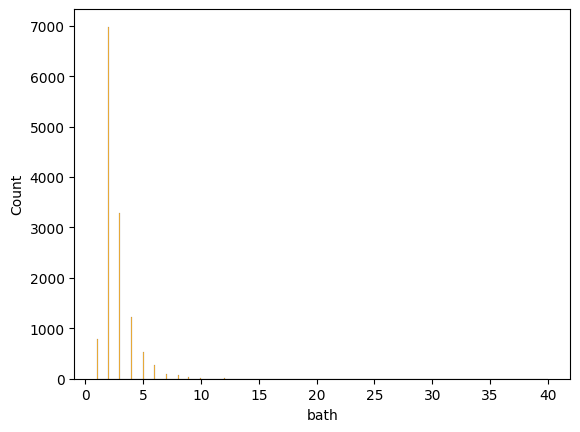

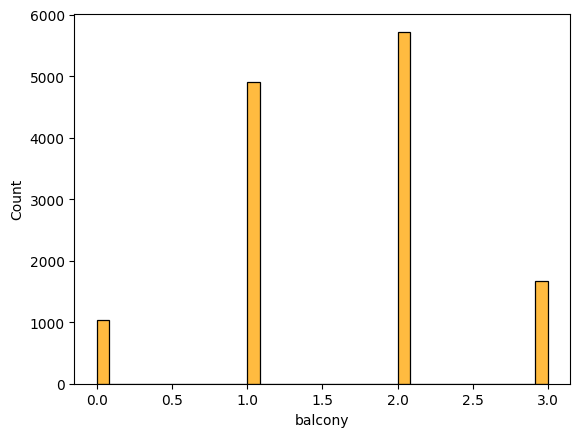

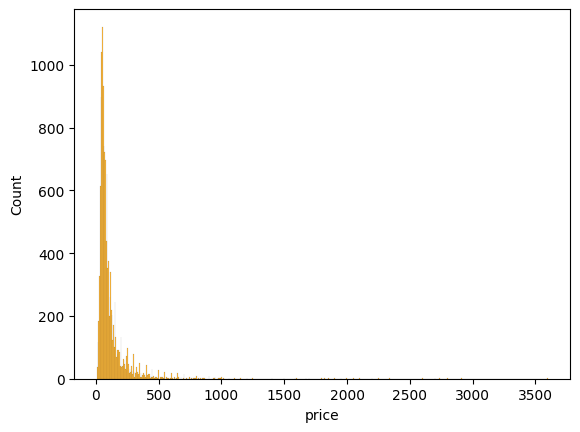

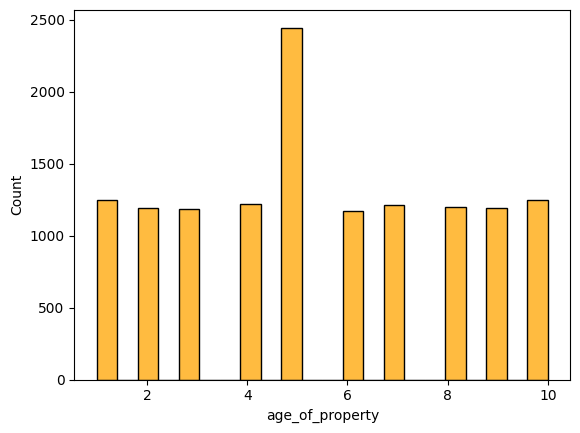

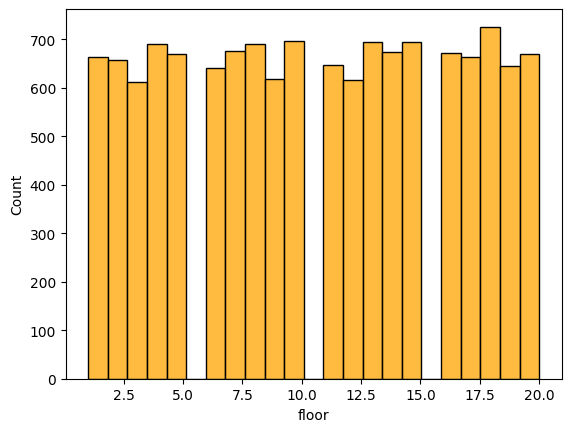

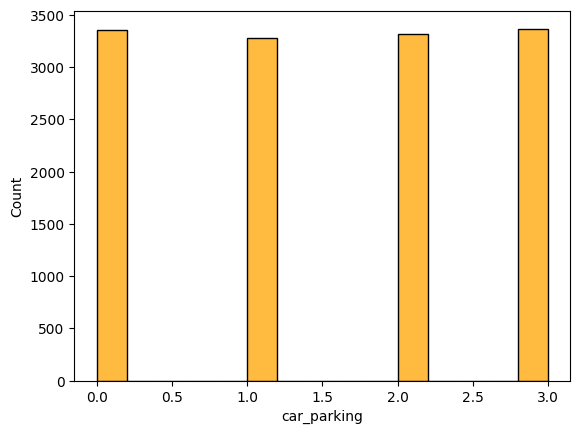

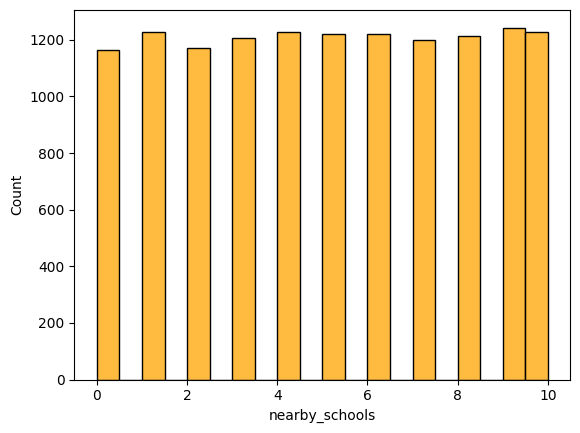

In [15]:
#histogram to understand the distribution

import warnings
warnings.filterwarnings('ignore')

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,color = 'orange')
  plt.show()


In [16]:
df.select_dtypes(include="number").columns

Index(['bath', 'balcony', 'price', 'age_of_property', 'floor', 'car_parking',
       'nearby_schools'],
      dtype='object')

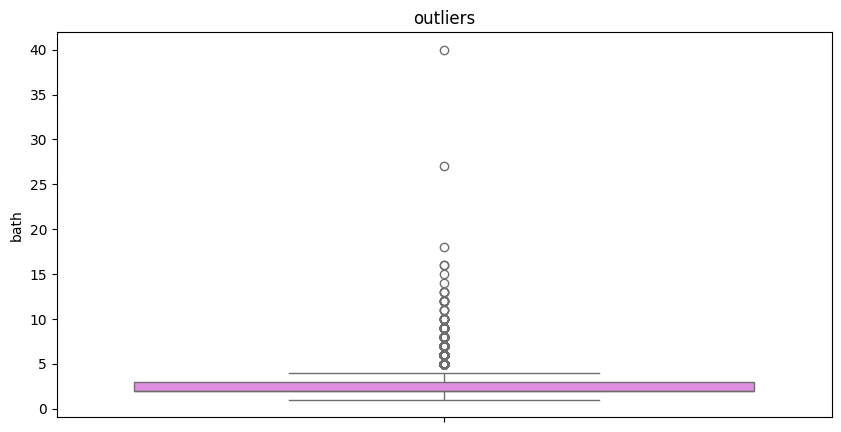

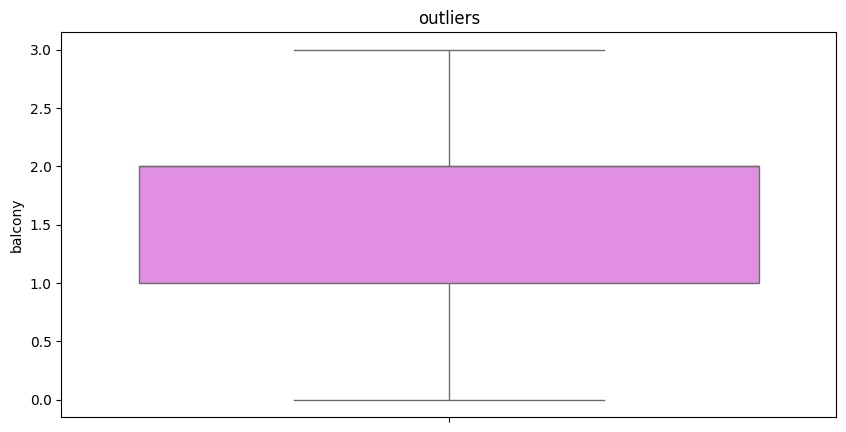

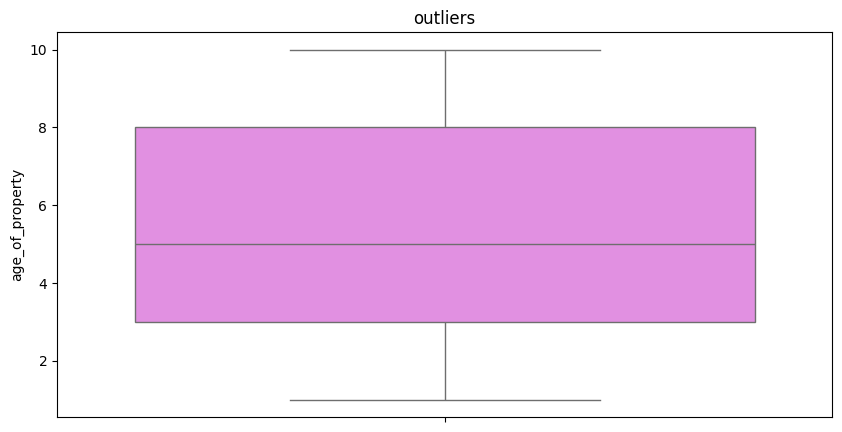

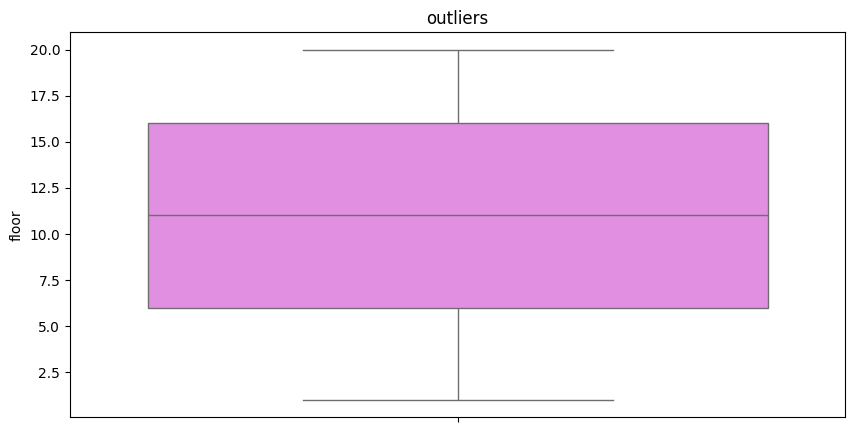

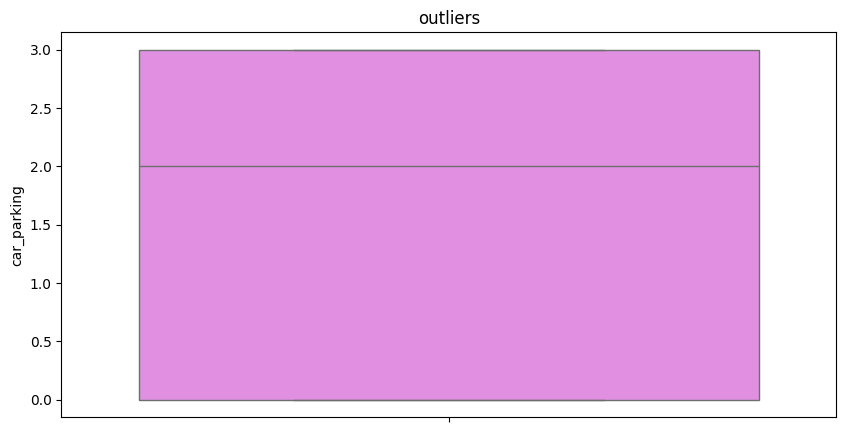

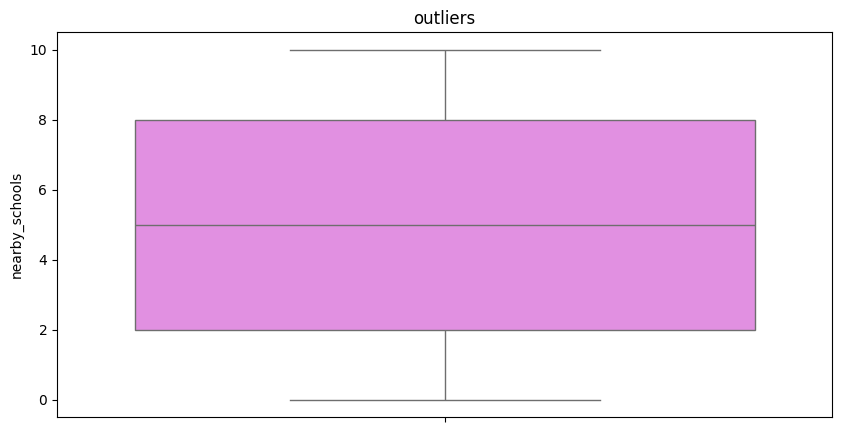

In [17]:
#boxplot to check outliers

numerical_columns = ['bath','balcony', 'age_of_property', 'floor', 'car_parking','nearby_schools']
for i in numerical_columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i],color='violet')
  plt.xticks(rotation=90)
  plt.title('outliers')
  plt.show()

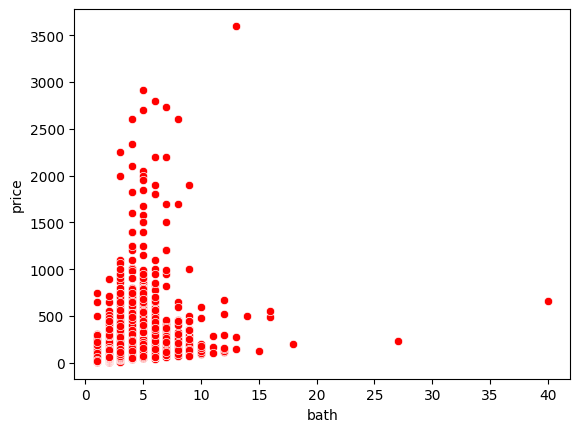

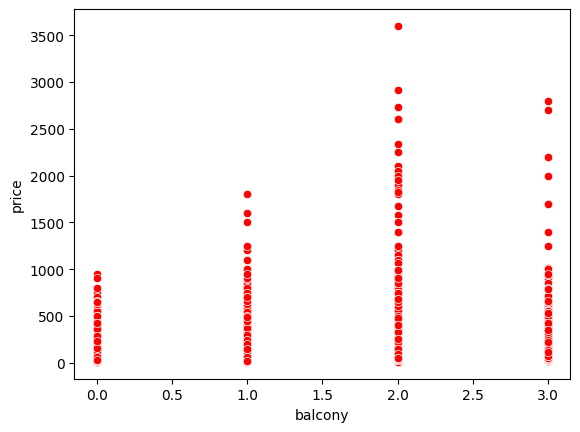

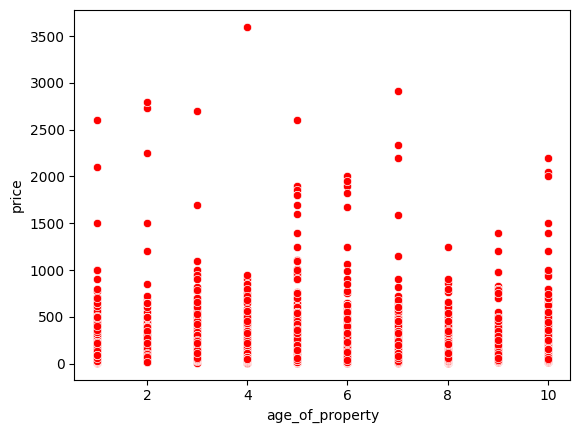

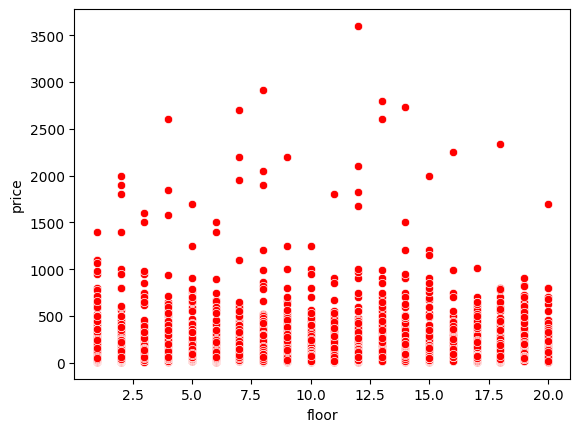

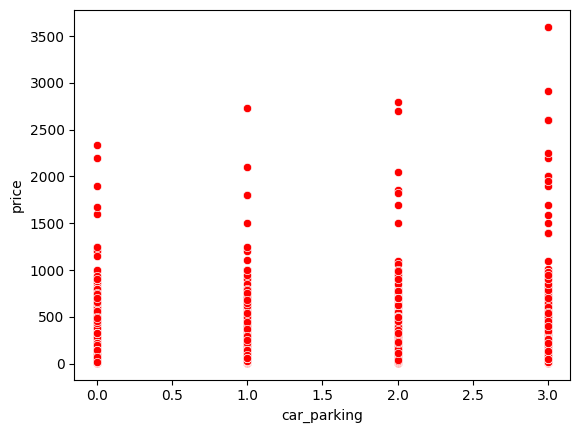

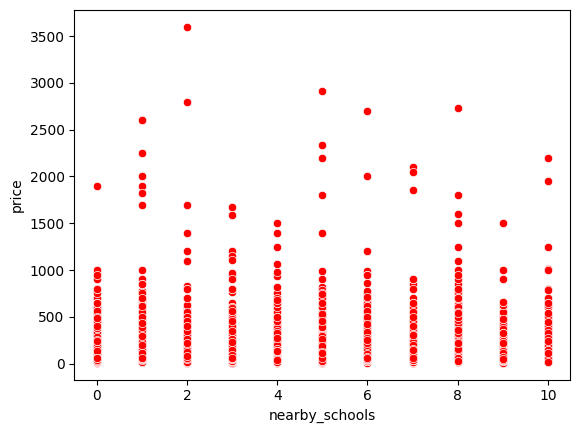

In [18]:
#scatter plot to understand relationship

for i in ['bath', 'balcony', 'age_of_property', 'floor', 'car_parking',
       'nearby_schools']:
       sns.scatterplot(data=df,x=i,y='price',color='red')
       plt.show()

In [19]:
#correlation with heatmap to interpret relation

s = df.select_dtypes(include="number").corr()

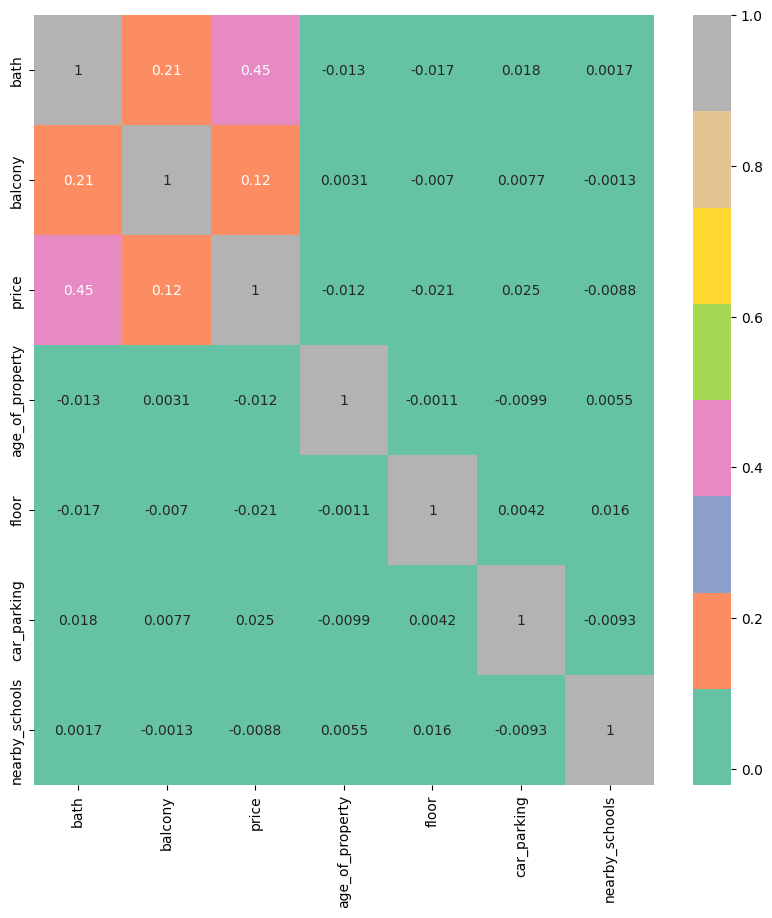

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True, cmap='Set2')
plt.show()

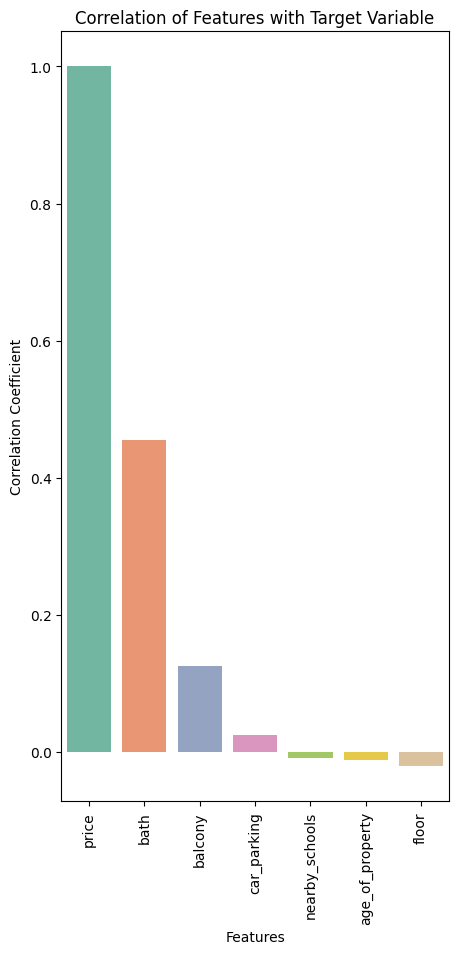

In [21]:
nu= df.select_dtypes(include=['int64', 'float64'])
correlation_matrix=nu.corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)

# Plotting the correlation with target
plt.figure(figsize=(5, 10))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='Set2')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

EXPLORATORY DATA ANALYSIS

In [22]:
#dropping unnecessary features

df.drop(columns=['area_type','availability','furnishing_status','age_of_property','floor','car_parking','nearby_schools'],inplace=True)

In [23]:
df.head()

,location,size,total_sqft,bath,balcony,price,property_type
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,Plot
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,Studio
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,Apartment
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,Villa
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,Villa


In [24]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [26]:
df.head()

,location,size,total_sqft,bath,balcony,price,property_type,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,Plot,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,Studio,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,Apartment,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,Villa,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,Villa,2


In [27]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [29]:
#columns contain non_float values ~ invert conditions [true return false false returns true]

df[~df['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,balcony,price,property_type,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,Studio,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,Independent House,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,Independent House,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,Plot,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,Plot,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,Apartment,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,Independent House,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,Plot,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,Plot,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,Plot,2


In [30]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [31]:
#check wheather how the function convert works

convert_sqft_to_num('2600')

2600.0

In [32]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [33]:
convert_sqft_to_num('34.46Sq. Meter')

In [34]:
df1 = df.copy()
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)
df1.head(10)

,location,size,total_sqft,bath,balcony,price,property_type,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,Plot,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,Studio,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,Apartment,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,Villa,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,Villa,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,Studio,2
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,Studio,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,Independent House,4
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,Studio,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,2.0,370.00,Apartment,6


In [35]:
#check wheather range of value convert to float

df1.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
balcony,0.0
price,186.0
property_type,Studio
bhk,4


In [36]:
# creating a new column price per sqft
df2 = df1.copy()
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head(10)


,location,size,total_sqft,bath,balcony,price,property_type,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,Plot,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,Studio,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,Apartment,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,Villa,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,Villa,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,Studio,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,Studio,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,Independent House,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,Studio,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,2.0,370.00,Apartment,6,36274.509804


In [37]:
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [38]:
len(df2['location'].unique())


1305

In [39]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [40]:
len(location_stats[location_stats<=10])

1053

In [41]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Sadashiva Nagar,10
Nagappa Reddy Layout,10
Nagadevanahalli,10
Dodsworth Layout,10
1st Block Koramangala,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [42]:
len(df2.location.unique())

1294

In [43]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

242

In [44]:
df2.head(10)

,location,size,total_sqft,bath,balcony,price,property_type,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,Plot,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,Studio,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,Apartment,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,Villa,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,Villa,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,Studio,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,Studio,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,Independent House,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,Studio,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,Apartment,6,36274.509804


In [45]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,property_type,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,Apartment,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,Studio,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,Villa,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,Apartment,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,Apartment,3,20000.000000


In [46]:
df2.shape

(13320, 9)

In [47]:
df3 = df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12576, 9)

In [48]:
df3.price_per_sqft.describe()

,price_per_sqft
count,12530.000000
mean,6303.979357
std,4162.237981
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [49]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(10301, 9)

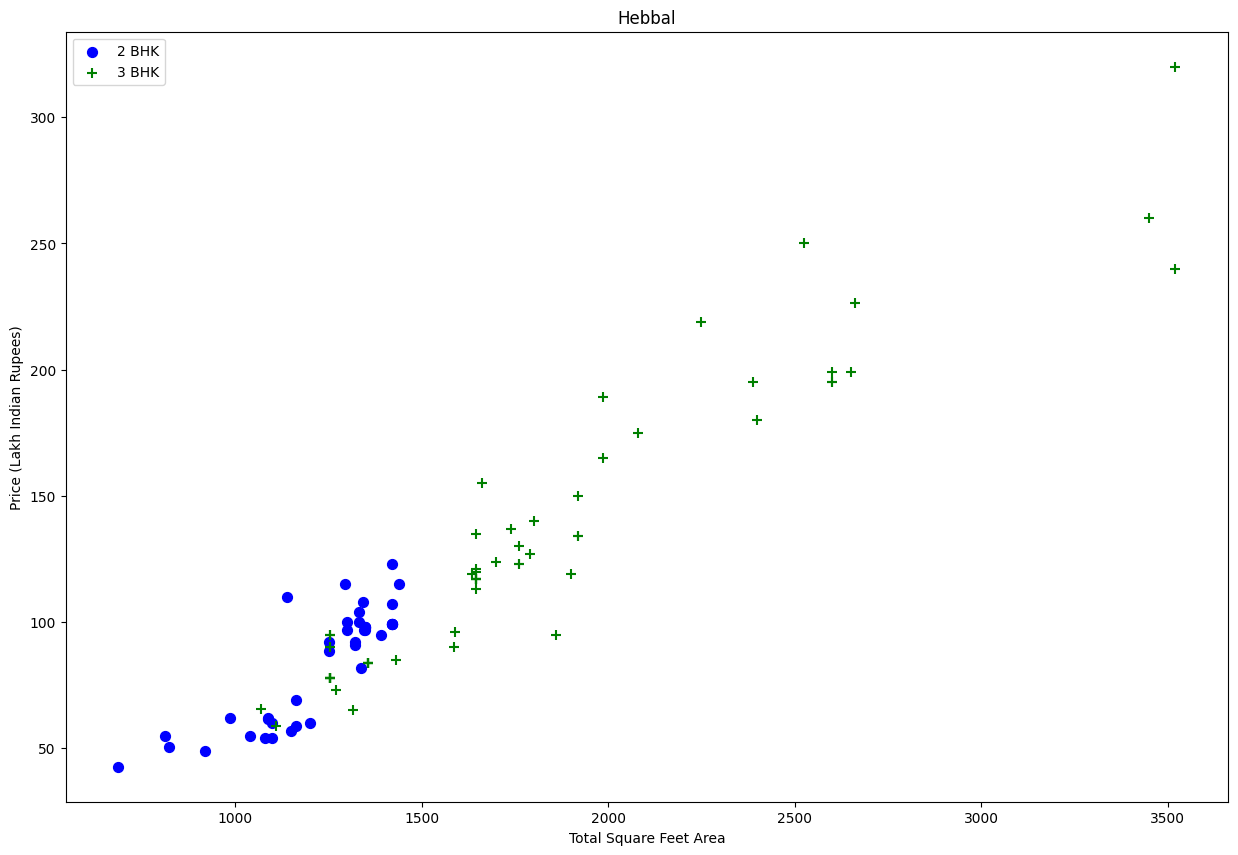

In [50]:


def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  import matplotlib
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df4,"Hebbal")

remove properties where for same location,the price of 3 bedroom apartment is less than 2 bedroom apartment(with same sqft area)

In [51]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7361, 9)

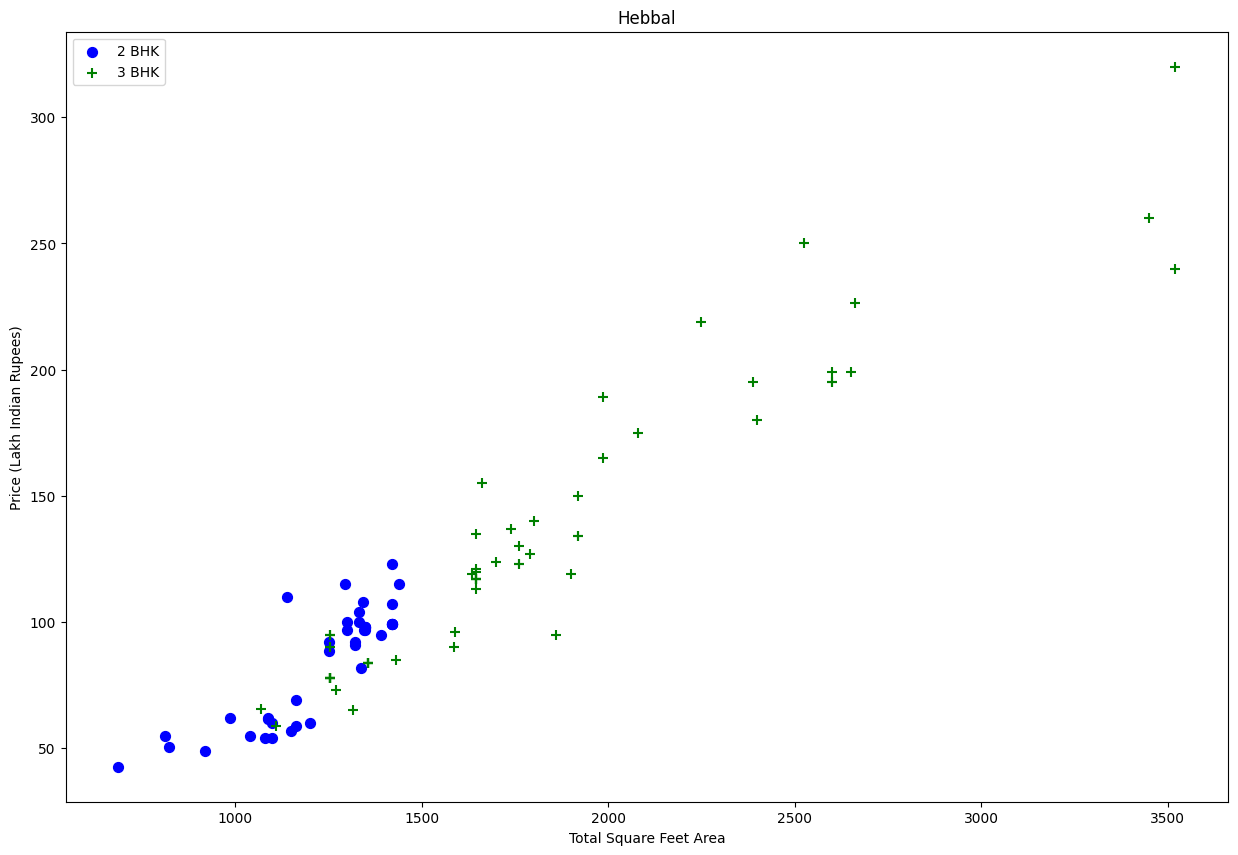

In [52]:
plot_scatter_chart(df4,"Hebbal")

Text(0, 0.5, 'Count')

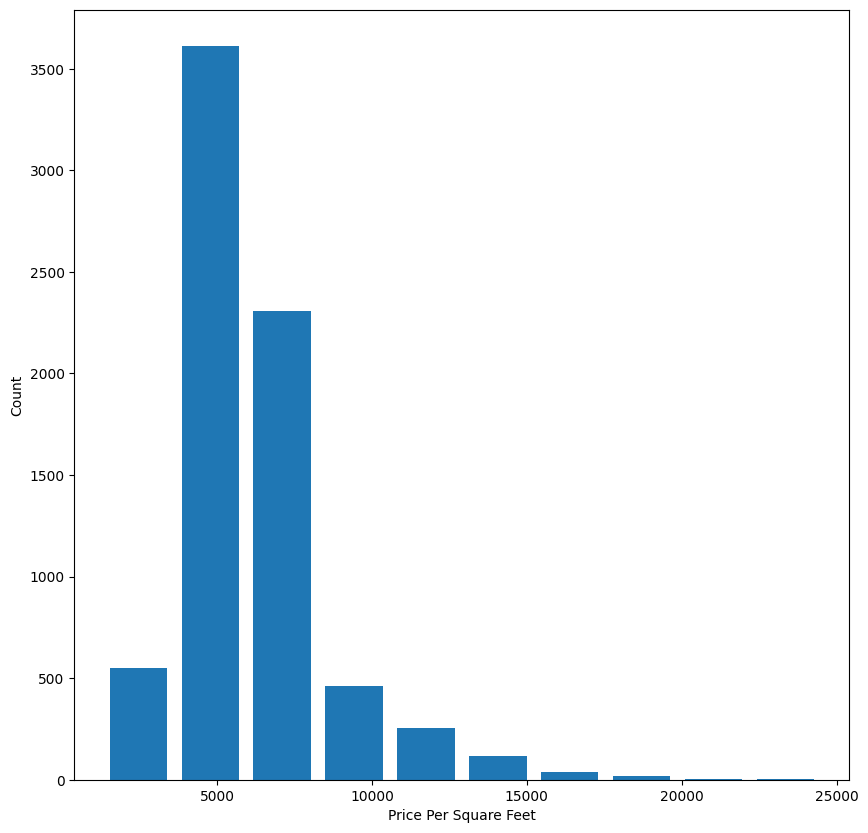

In [53]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

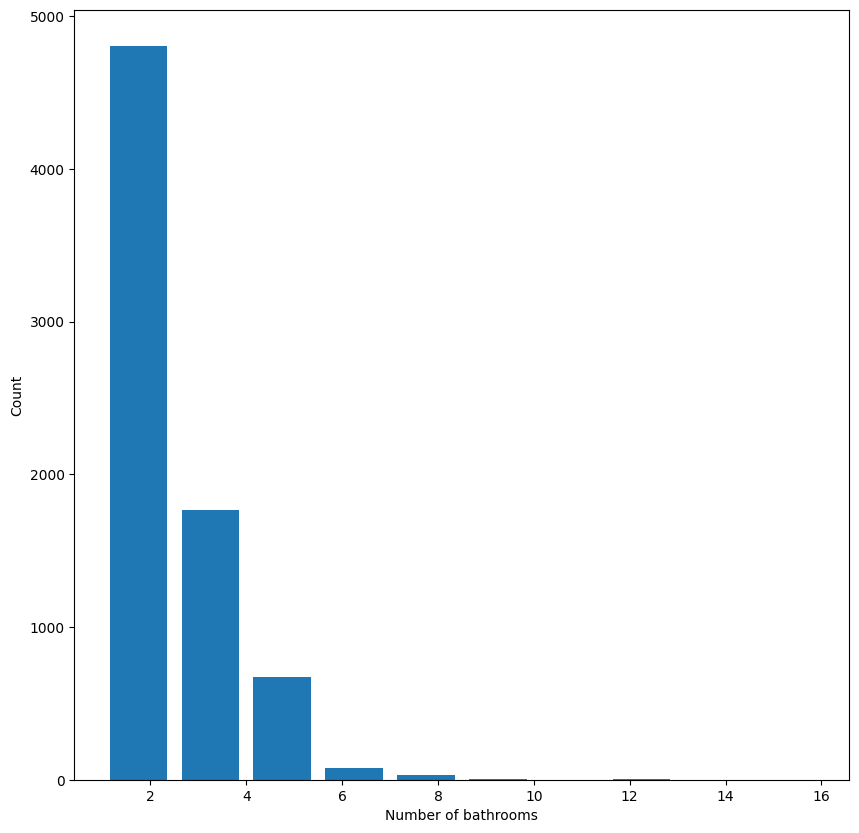

In [54]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [55]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,balcony,price,property_type,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,Independent House,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,Studio,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,Studio,3,6423.034330
8468,other,6 BHK,11338.0,9.0,1.0,1000.0,Studio,6,8819.897689


In [56]:
df6 = df5[df5.bath<df5.bhk+2]
df6.shape

(7282, 9)

In [57]:
df7 = df6.drop(['size','price_per_sqft','balcony','property_type'],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [58]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7282 entries, 0 to 10300
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7282 non-null   object 
 1   total_sqft  7282 non-null   float64
 2   bath        7282 non-null   float64
 3   price       7282 non-null   float64
 4   bhk         7282 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 341.3+ KB


ENCODING (ONE HOT ENCODING)

In [59]:

dummies = pd.get_dummies(df7.location).astype(int)
dummies.head(3)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df9 = df8.drop('location',axis='columns')
df9.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df9.shape

(7282, 245)

In [63]:
#defining x and y

X = df9.drop(columns=['price'])


In [64]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y = df9['price']
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalize the bath bhk columns
df9[['bath','bhk']] = scaler.fit_transform(df9[['bath','bhk']])

# standardize the total_sqft,price columns
df9[['total_sqft','price']] = scaler.fit_transform(df9[['total_sqft','price']])
df9.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1.675518,1.702014,3.762869,1.661754,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.189822,0.632176,1.104353,0.565261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.488179,-0.437661,1.570161,0.565261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.333825,-0.437661,0.377237,0.565261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.291202,-0.437661,0.581738,-0.531231,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TRAINING AND TESTING

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8737160101647584

In [69]:
#using SVR

from sklearn.svm import SVR
svm_clf = SVR()
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.46011284449932444

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.8646487602606078

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82123588, 0.85923391, 0.86877561, 0.8551165 , 0.81777938])

In [72]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

HYPERPARAMETER TUNING

In [73]:


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [5, 10],  # Reduced range
                'max_depth': [None, 10, 20]  # Example additional parameter
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1],  # Narrowed down alpha
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)  # Reduced n_splits to 3

    for algo_name, config in algos.items():
        gs = RandomizedSearchCV(
            config['model'], config['params'],
            cv=cv, return_train_score=False, n_jobs=-1, n_iter=10
        )  # Using RandomizedSearchCV with n_iter=10
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])




In [75]:
def find_best_model_using_gridsearchcv(X,y):
  algos = {
      'linear_regression' : {
          'model': LinearRegression(),
          'params': {
              'fit_intercept': [True, False]
          }
      },
      'random_forest': {
          'model': RandomForestRegressor(),
          'params' : {
              'n_estimators': [1,5,10]
          }
      },
      'lasso': {
          'model': Lasso(),
          'params': {
              'alpha': [1,2],
              'selection': ['random', 'cyclic']
          }
      },
      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion' : ['mse','friedman_mse'],
              'splitter': ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [76]:
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.845056,{'fit_intercept': False}
1,random_forest,0.809350,{'n_estimators': 10}
2,lasso,0.687574,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.734423,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [77]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [78]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [79]:
np.where(X.columns=='1st Phase JP Nagar')[0][0] #how it works

4

In [80]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

82.5177496245755

In [81]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

79.13401310554481

In [82]:
predict_price('Indira Nagar',1000, 2, 2)

193.28234401899618

In [83]:
predict_price('Indira Nagar',1000, 3, 3)

192.64059041509466

In [84]:
predict_price('Electronic City Phase II',1056, 2, 2)

36.506252533966034

MODEL BUILDING

In [85]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))